<a href="https://colab.research.google.com/github/MAHEND-VERMA/Exploratory-Data-Analysis-/blob/main/MAHEND_VERMA_Hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel booking

# We will try to answer the following Questions

#1( What type of hotel does a customer book in general?
#2) Which year most of customers arrive?
#3) Which are the busiest months in the year of hotel booking?
#4) How many booking were cancelled.
#5) From which country most guests arrive.
#6) How customers booked their hotel from market segment.
#7) How many customers were stays in week nights and booking changes?
#8) How many repeated customers?
#9) Deposit type payment of customer?
#10) Correlation of Data Set)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
## Importing Data
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Data Pre-Processing

In [23]:
df=data.copy()

1. Dealing with Missing Values

In [24]:
df.isnull().sum().sort_values(ascending=False)[:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

In [25]:
## Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)


In [26]:
## If no id of agent or company is null, just replace it with 0
df[['agent']] = df[['agent']].fillna(0.0)
df[['company']] = df[['company']].fillna(0.0)



In [27]:
df.isnull().sum().sort_values(ascending=False)[:5]

country               478
children                4
hotel                   0
agent                   0
reserved_room_type      0
dtype: int64

In [28]:
## For the missing values in the country column, replace it with mode 
df['country'].fillna(data.country.mode().to_string(), inplace=True)


In [29]:
df.isnull().sum().sort_values(ascending=False)[:5]

children                     4
hotel                        0
previous_cancellations       0
reservation_status           0
total_of_special_requests    0
dtype: int64

In [30]:
df['children'].value_counts()

0.0     110616
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [31]:
## for missing children value, replace it with rounded mean value
df['children'].fillna((data.children.mean()), inplace=True)

In [32]:
df.isnull().sum().sort_values(ascending=False)[:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

### 2. Converting *Datatype*

In [34]:
## convert datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

### **1.Which type of hotel does a customer book in general?** 

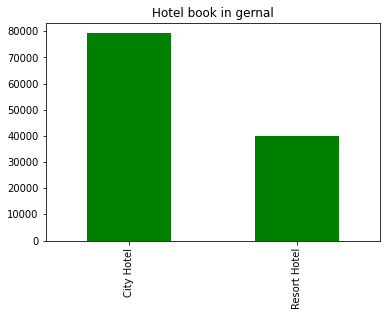

In [35]:
x= df['hotel'].value_counts()
x.plot(kind='bar' ,title='Hotel book in gernal' , color='g')


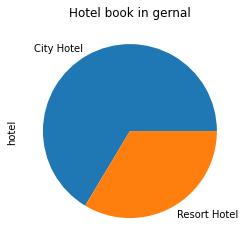

In [36]:
x= df['hotel'].value_counts()
x.plot(kind='pie' ,title='Hotel book in gernal')

## **2.Which year most of customer arrive?**

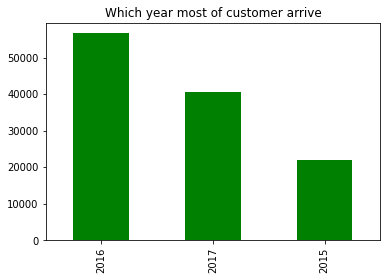

In [37]:
x=df['arrival_date_year'].value_counts()
x.plot(kind='bar' ,title='Which year most of customer arrive' , color='g')

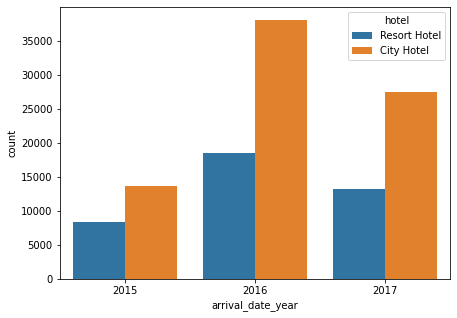

In [38]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df)

### **3.Which are the busiest months in the year of hotel booking?**

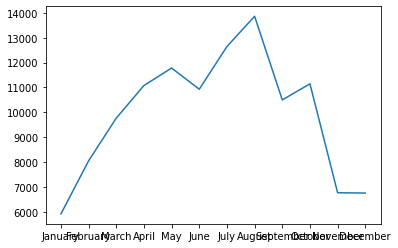

In [39]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
x=df['arrival_date_month'].value_counts().reindex(new_order)
plt.figsize=(20,10)
plt.plot(x)


### **4.How many bookings were cancelled?**

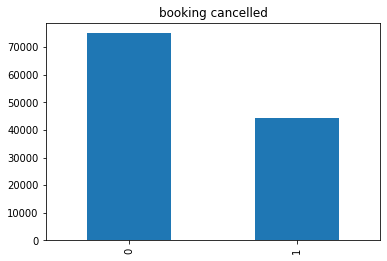

In [40]:
x=df['is_canceled'].value_counts()
x.plot(kind='bar', title='booking cancelled')

### **5.From which country most guest arrive?**

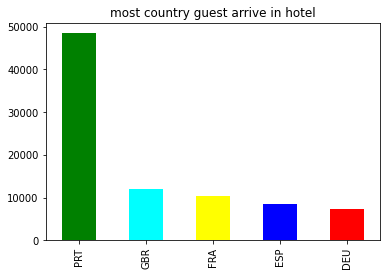

In [41]:
x= df['country'].value_counts()[:5]
x.plot(kind='bar',title='most country guest arrive in hotel',color=[ 'green','cyan', 'yellow', 'blue', 'red'])

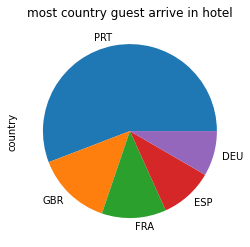

In [43]:
x= df['country'].value_counts()[:5]
x.plot(kind='pie',title='most country guest arrive in hotel')

### \**6.How customer booked their hotel from market segment?**

In [44]:
x=[df['market_segment'].value_counts()[:1]]
x

[Online TA    56408
 Name: market_segment, dtype: int64]

**7. How many customers were stays in week nights and booking changes?**

In [45]:
x=df['stays_in_week_nights']+df['booking_changes']
x.sort_values().tail()

9839     40
54704    40
14037    42
1655     50
14038    52
dtype: int64

**8. How many repeated customers?**

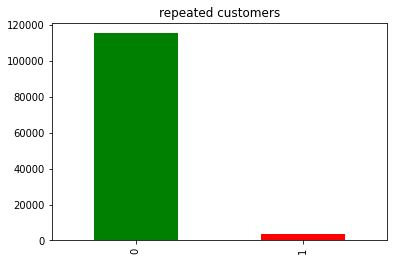

In [46]:
x=df['is_repeated_guest'].value_counts()
x.plot(kind='bar',title='repeated customers',color=['green','red'])

**9. Deposite type payment of customer?**

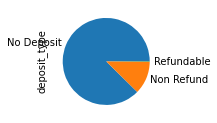

In [48]:
x=df['deposit_type'].value_counts()
x.plot(kind='pie',figsize=(7,2))

**10. Correlation of dataset?**

In [49]:
corr_df = df.corr()

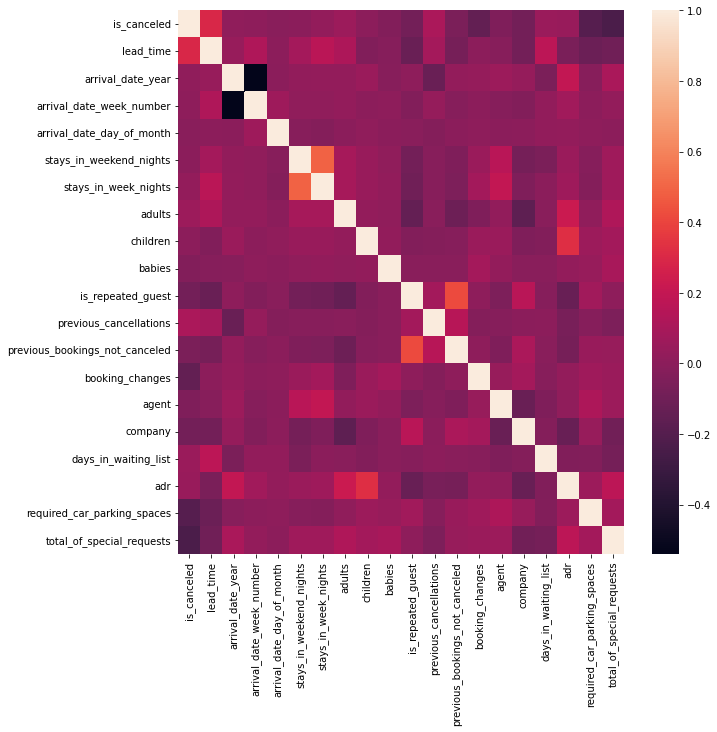

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_df)